In [2]:
# all the imports
import pandas as pd
import matplotlib.pyplot as plt

# Thimo's
import requests
import random as rnd
import datetime, time
import re

import numpy as np

First, the noise produced by the function generator has to be determined. For this, we chose different settings with varying attenuation [0 dB, 20 dB, 40 dB] and frequencies [5 Hz, 40 Hz]. The displayed sinus' are the result using the Voltcraft FG-506 function generator in combination with a Rhode & Scharz Oscillator HMO 1524. Due to the update/save implementation of the oscillator, some sudden jumps could not be prevented (eg. TRC04.csv).


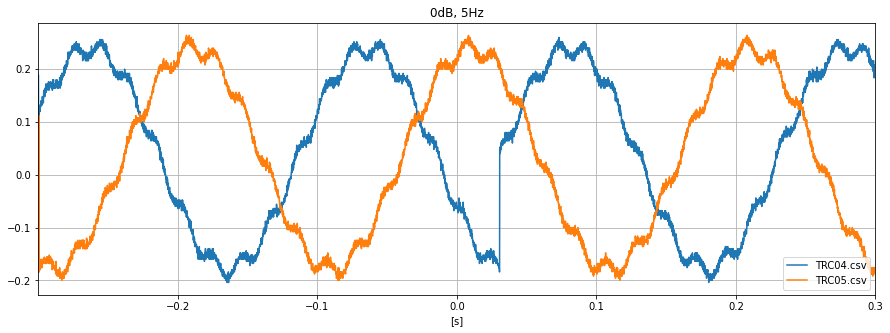

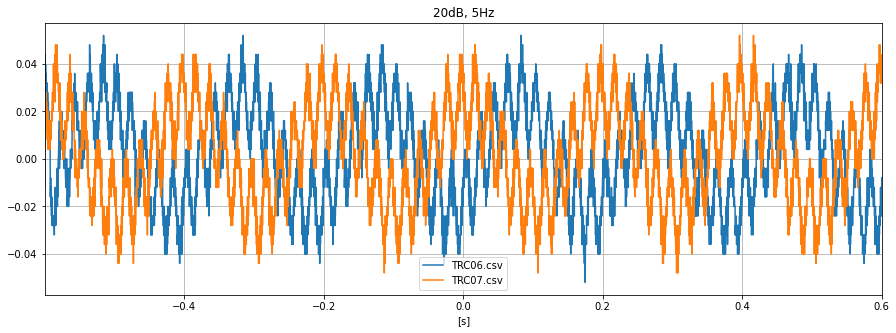

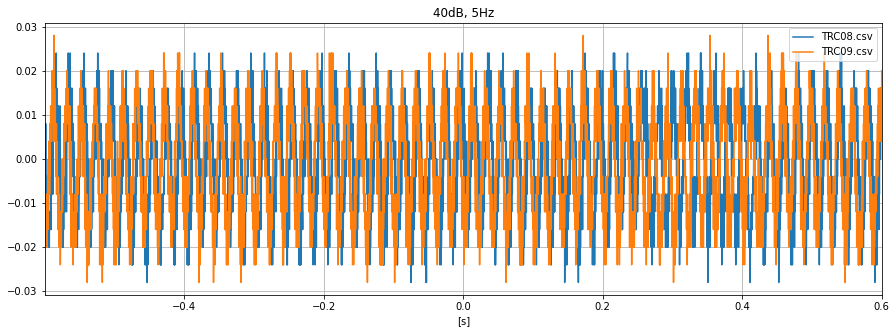

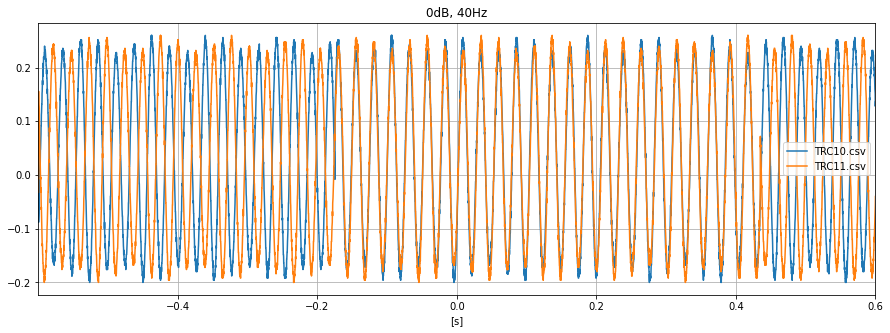

In [68]:
def display_two_complete(filename1, filename2, title):
    '''
    Displays the two rounds of test we need with each setting combination in a graph
    -------------------------------------------------------------------------------
    filename1 (string): name of the first file as a string, has to be in same folder
    filename2 (string): name of the second file as a string, has to be in same folder
    title (string): specification of attenuation and frequency 
    '''
    df1 = pd.read_csv(filename1, index_col=0).rename(columns = {'CH1[V]':filename1})
    df2 = pd.read_csv(filename2, index_col=0).rename(columns = {'CH1[V]':filename2})
    df = df1.join(df2[filename2])
    df.plot(y=[filename1,filename2], use_index = True, grid=True , title = title, figsize=(15,5))
    
display_two_complete('TRC04.csv','TRC05.csv', "0dB, 5Hz" )
display_two_complete('TRC06.csv','TRC07.csv', "20dB, 5Hz")
display_two_complete('TRC08.csv','TRC09.csv', "40dB, 5Hz")
display_two_complete('TRC10.csv','TRC11.csv', "0dB, 40Hz")

The noise level of all sinus' is high, the curve is not crystal clear and that's a problem. The reason might be the electronic noise from the powerline or the train. Not too great because testing how much noise the Traumschreiber produces/measures is difficult if there is so much noise to begin with. But we can take the difference and get the absolut value. Nice, nice. Cool, cool. Let's do that!  

In [43]:
# import the data we measured with the Traumschreiber

TodaysExp =  pd.read_csv("test2.csv")#, index_col=0)

exp2 =  pd.read_csv("20200709-12h01EEGrecording.csv")
exp3 =  pd.read_csv("20200709-12h04EEGrecording.csv")
exp4 =  pd.read_csv("20200709-12h12EEGrecording.csv")
exp5 =  pd.read_csv("20200709-12h23EEGrecording.csv")
exp6 =  pd.read_csv("20200709-12h25EEGrecording.csv")
exp7 =  pd.read_csv("20200709-12h31EEGrecording.csv")
exp8 =  pd.read_csv("20200709-12h34EEGrecording.csv")
exp9 =  pd.read_csv("20200709-12h43EEGrecording.csv")


# find out what channels are actually displayed 
# maybe devide evrything by 298 (nV) 
# tidy up overleaf file
# read thomas' code
# repeat the whole experiment with Paria's board
# Test the App
def displayAllTheChannels(file):
    file = file.loc[0.004:1.004]
    file.rename(columns={'Unnamed: 1':'Channel 1', 'Unnamed: 2':'Channel 2', 'Unnamed: 3':'Channel 3', 'Unnamed: 4':'Channel 4', 'Unnamed: 5':'Channel 5', 'Unnamed: 6':'Channel 6'}, inplace=True )
    file.plot(y=["Channel 1", "Channel 2" , "Channel 3" , "Channel 4" , "Channel 5", "Channel 6" ], grid=True , figsize=(15,30), subplots=True, layout=(6,1))


exp9.head()    

#displayAllTheChannels(exp9)

,time,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0.000,1.594291e+09,-86704,4396,1988,890746,-893318,-2142,NaN
0.004,1.594291e+09,-13707,3140,3442,525724,-531344,-476,NaN
0.008,1.594291e+09,2962,2066,3936,-653,-6712,1137,NaN
0.012,1.594291e+09,-2560,1165,3525,1714,-7917,337,NaN
0.016,1.594291e+09,-50336,317,2283,243788,-246765,-1913,NaN


In [59]:
TE = TodaysExp.iloc[1:]
#print(TE.head())
TE.columns = TE.iloc[0]
TE.head()
TE_ = TE.iloc[1:]
print(TE_.head())
#TE.drop([2])
#TE.head()

# def displayAllTheChannels_today(file):
#     #file = file.loc[0.004:1.004]
#     #file.rename(columns={'Ch-1':'Channel 1', 'Unnamed: 2':'Channel 2', 'Unnamed: 3':'Channel 3', 'Unnamed: 4':'Channel 4', 'Unnamed: 5':'Channel 5', 'Unnamed: 6':'Channel 6'}, inplace=True )
#     file.plot(y=["Ch-1", "Ch-2" , "Ch-3" , "Ch-4" , "Ch-5", "Ch-6" ], grid=True , figsize=(15,30), subplots=True, layout=(6,1))

 


Time    Ch-1        Ch-2      Ch-3      Ch-4       Ch-5        Ch-6 Ch-7 Ch-8  \
0.0   -0.495      -0.132   -58.608      -3.3    -56.694    6488.064  NaN  NaN   
9.0   -3.597      -1.155  -285.747     -2.31  121111.95      -0.165  NaN  NaN   
10.0  -1.353  -231209.94    -2.772    -3.762    -13.596      -0.132  NaN  NaN   
11.0  -5.907  -173013.86    -0.429    -4.059     -4.059  -131923.56  NaN  NaN   
12.0  -0.231       -0.33  138413.1  82512.11     -0.759  -248708.89  NaN  NaN   

Time  NaN  NaN  NaN  NaN  NaN  NaN  
0.0   NaN  NaN  NaN  NaN  NaN  NaN  
9.0   NaN  NaN  NaN  NaN  NaN  NaN  
10.0  NaN  NaN  NaN  NaN  NaN  NaN  
11.0  NaN  NaN  NaN  NaN  NaN  NaN  
12.0  NaN  NaN  NaN  NaN  NaN  NaN  
